In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x_train = pd.read_csv("train_Df64byy.csv")
x_test = pd.read_csv("test_YCcRUnU.csv")
sample = pd.read_csv("sample_submission_QrCyCoT.csv")

In [3]:
x_train.drop(columns="ID",inplace=True)
sample = x_test["ID"]
x_test.drop(columns="ID",inplace=True)

In [4]:
sample = np.array(sample).reshape(-1,1)

In [5]:
x_train.isnull().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [6]:
x_train

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [11]:
city_region_aggregate_features = x_train.groupby(['City_Code']).agg({'Lower_Age': ['mean', 'max', 'min','std'],
                                                     'Reco_Policy_Premium': ['mean', 'max', 'min','std','sum'],  
                                                     'Accomodation_Type': ['nunique','count'],
                                                     'Reco_Insurance_Type': ['nunique','count'] ,
                                                     'Health Indicator': ['nunique','count'] ,
                                                     'Holding_Policy_Type': ['nunique','count'] ,
                                                     'Reco_Policy_Cat': ['nunique','count'] ,
                                                     })

In [12]:
city_region_aggregate_features

Lower_Age                    Reco_Policy_Premium                   \
                mean max min        std                mean      max     min   
City_Code                                                                      
C1         49.628218  75  16  18.095975        16667.890003  42739.2  2840.0   
C10        40.490999  75  16  15.451158        13674.240596  39843.0  2964.0   
C11        41.233653  75  16  17.098049        13678.026155  40067.2  2408.0   
C12        41.048387  75  16  16.742227        13633.712673  34070.4  2608.0   
C13        40.401990  75  16  17.153676        12606.666866  34790.4  2576.0   
C14        43.833780  75  16  17.925925        13475.490885  35276.8  2752.0   
C15        43.016863  75  16  16.763675        15404.295953  40067.2  3642.0   
C16        34.209692  75  16  15.357931        11954.246872  36540.8  2408.0   
C17        40.203624  75  16  16.363845        12951.422088  38851.2  2280.0   
C18        40.623588  75  16  16.650753        14074.326223  39520.0  2532.0   
C19        43.923248  75  16  16.697949        14328.743048  38851.2  2804.0   
C2         44.518265  75  16  17.058791        15172.963031  43350.4  2616.0   
C20        40.212743  75  16  17.006297        12382.896976  33573.0  2528.0   
C21        42.484536  75  16  15.687001        13992.227393  39687.2  3534.0   
C22        40.507752  75  16  17.547769        13431.620543  35251.2  2280.0   
C23        38.993186  75  16  16.141333        12430.976831  38764.8  3540.0   
C24        44.043400  75  16  16.658275        15155.628210  43046.4  4080.0   
C25        37.595628  75  16  17.140527        11425.117486  30564.0  2304.0   
C26        45.202405  75  18  17.807908        14660.094990  32939.2  3360.0   
C27        39.735593  75  16  16.171212        12901.639322  37555.2  3744.0   
C28        40.442105  75  16  16.482416        13700.769825  35251.2  2944.0   
C29        37.312661  75  16  16.072469        11186.955556  28608.0  2946.0   
C3         41.020250  75  16  16.462742        13716.536306  41496.0  2548.0   
C30        49.206897  75  16  18.129900        16927.875862  29836.8  5200.0   
C31        34.200000  60  23  12.757071         9963.600000  17136.0  4302.0   
C32        39.293750  75  16  16.383224        12506.216250  32803.2  3534.0   
C33        39.041958  75  17  17.596201        12558.805594  31802.4  3852.0   
C34        36.576923  75  16  15.470835        12643.241538  33580.8  2612.0   
C35        39.964286  75  20  16.066865        11767.560714  24720.0  3276.0   
C36        42.111111  75  19  16.755004        14233.377778  36576.0  4278.0   
C4         40.246799  75  16  17.092188        12514.548624  39558.0  2380.0   
C5         38.777126  75  16  15.080032        13334.003959  39398.4  3678.0   
C6         39.513846  75  16  16.737633        12439.460410  36480.0  2464.0   
C7         42.003665  75  16  17.085233        14363.721571  42066.0  2488.0   
C8         40.374308  75  16  16.182836        13394.236434  39974.4  2472.0   
C9         39.236156  75  16  15.745110        12658.102059  38182.4  2508.0   

                                    Accomodation_Type        \
                   std          sum           nunique count   
City_Code                                                     
C1         7177.976858  149560977.0                 2  8973   
C10        6149.492450   22029201.6                 2  1611   
C11        6436.932501   15688696.0                 2  1147   
C12        6223.708895   11834062.6                 2   868   
C13        5881.588615   12669700.2                 2  1005   
C14        5811.295760   10052716.2                 2   746   
C15        6828.547673   18269495.0                 2  1186   
C16        5940.355437   13568070.2                 2  1135   
C17        6037.731169   15010698.2                 2  1159   
C18        6577.973447   11217238.0                 2   797   
C19        6083.212483   12881540.0                 2   899   
C2      

In [13]:
x = x_train

In [16]:
city_region_aggregate_features.columns = ['city_region_aggregate_features' + '_'.join(c).strip('_') for c in city_region_aggregate_features.columns]
x = pd.merge(x, city_region_aggregate_features, on = ['City_Code'], how='left')

In [ ]:
pd.

In [19]:
x.groupby('City_Code')["City_Code"].transform('max')

0         C3
1         C5
2         C5
3        C24
4         C8
        ... 
50877     C4
50878     C5
50879     C1
50880     C1
50881     C3
Name: City_Code, Length: 50882, dtype: object

In [17]:
x

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,...,city_region_aggregate_featuresc_i_t_y___r_e_g_i_o_n___a_g_g_r_e_g_a_t_e___f_e_a_t_u_r_e_s_A_c_c_o_m_o_d_a_t_i_o_n___T_y_p_e___n_u_n_i_q_u_e,city_region_aggregate_featuresc_i_t_y___r_e_g_i_o_n___a_g_g_r_e_g_a_t_e___f_e_a_t_u_r_e_s_A_c_c_o_m_o_d_a_t_i_o_n___T_y_p_e___c_o_u_n_t,city_region_aggregate_featuresc_i_t_y___r_e_g_i_o_n___a_g_g_r_e_g_a_t_e___f_e_a_t_u_r_e_s_R_e_c_o___I_n_s_u_r_a_n_c_e___T_y_p_e___n_u_n_i_q_u_e,city_region_aggregate_featuresc_i_t_y___r_e_g_i_o_n___a_g_g_r_e_g_a_t_e___f_e_a_t_u_r_e_s_R_e_c_o___I_n_s_u_r_a_n_c_e___T_y_p_e___c_o_u_n_t,city_region_aggregate_featuresc_i_t_y___r_e_g_i_o_n___a_g_g_r_e_g_a_t_e___f_e_a_t_u_r_e_s_H_e_a_l_t_h_ _I_n_d_i_c_a_t_o_r___n_u_n_i_q_u_e,city_region_aggregate_featuresc_i_t_y___r_e_g_i_o_n___a_g_g_r_e_g_a_t_e___f_e_a_t_u_r_e_s_H_e_a_l_t_h_ _I_n_d_i_c_a_t_o_r___c_o_u_n_t,city_region_aggregate_featuresc_i_t_y___r_e_g_i_o_n___a_g_g_r_e_g_a_t_e___f_e_a_t_u_r_e_s_H_o_l_d_i_n_g___P_o_l_i_c_y___T_y_p_e___n_u_n_i_q_u_e,city_region_aggregate_featuresc_i_t_y___r_e_g_i_o_n___a_g_g_r_e_g_a_t_e___f_e_a_t_u_r_e_s_H_o_l_d_i_n_g___P_o_l_i_c_y___T_y_p_e___c_o_u_n_t,city_region_aggregate_featuresc_i_t_y___r_e_g_i_o_n___a_g_g_r_e_g_a_t_e___f_e_a_t_u_r_e_s_R_e_c_o___P_o_l_i_c_y___C_a_t___n_u_n_i_q_u_e,city_region_aggregate_featuresc_i_t_y___r_e_g_i_o_n___a_g_g_r_e_g_a_t_e___f_e_a_t_u_r_e_s_R_e_c_o___P_o_l_i_c_y___C_a_t___c_o_u_n_t
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,...,2,4889,2,4889,9,3753,4,2927,22,4889
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,...,2,1364,2,1364,7,1048,4,808,21,1364
2,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,...,2,1364,2,1364,7,1048,4,808,21,1364
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,...,2,553,2,553,9,433,4,368,18,553
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,...,2,1806,2,1806,9,1407,4,1082,21,1806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,...,2,3671,2,3671,9,2838,4,2062,21,3671
50878,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,...,2,1364,2,1364,7,1048,4,808,21,1364
50879,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,...,2,8973,2,8973,9,6873,4,5743,19,8973
50880,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,...,2,8973,2,8973,9,6873,4,5743,19,8973


In [78]:
xx_train["Holding_Policy_Duration"].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [79]:
cat_cols = ["City_Code","Accomodation_Type","Reco_Insurance_Type","Is_Spouse","Health Indicator","Holding_Policy_Duration"]

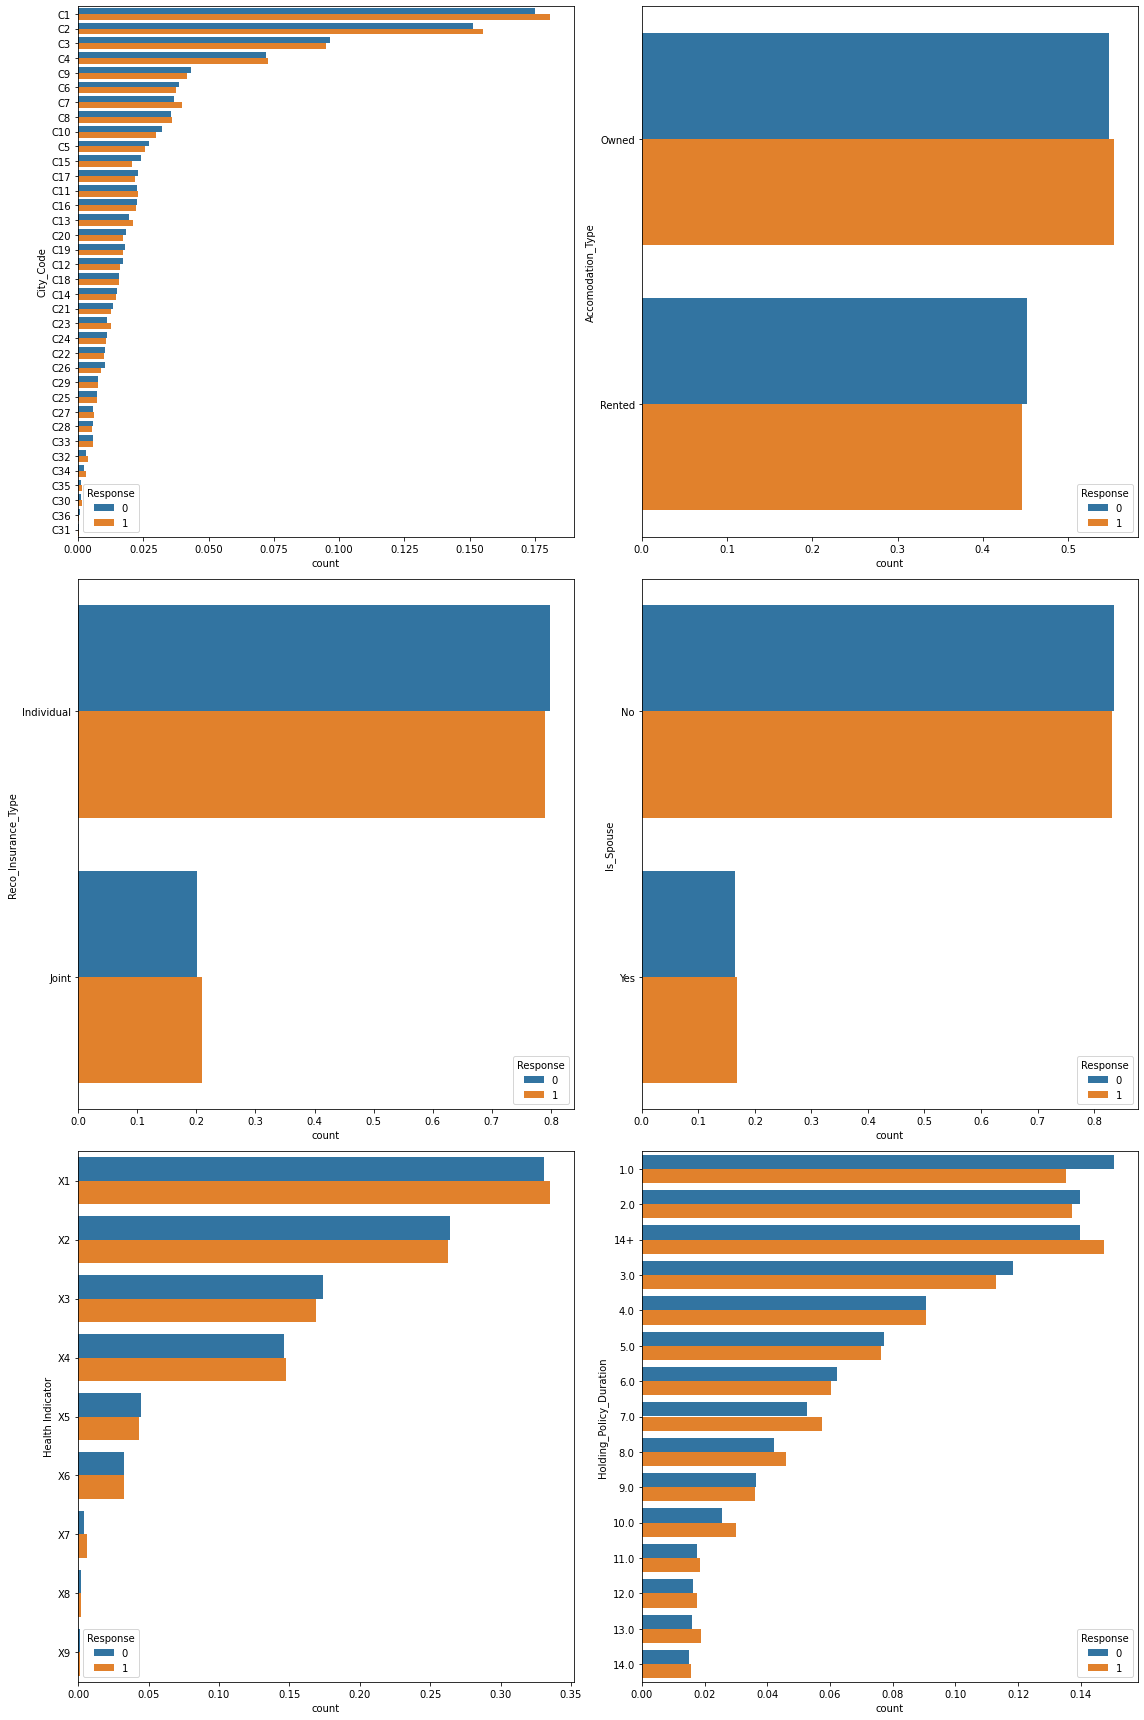

In [80]:
fig, axes = plt.subplots(3, 2, figsize=(16, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(x_train[cat_cols]):
    fltr = x_train["Response"] == 0
    vc_a = x_train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_b = x_train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a["Response"] = 0
    vc_b["Response"] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue="Response", ax=axes[i])
    
_ = plt.tight_layout()

In [81]:
x_train["Holding_Policy_Duration"].fillna('14+',inplace=True)
x_test["Holding_Policy_Duration"].fillna('14+',inplace=True)
# NAN

In [82]:
x_train["Holding_Policy_Type"].fillna(x_train["Holding_Policy_Type"].median(),inplace=True)
x_test["Holding_Policy_Type"].fillna(x_test["Holding_Policy_Type"].median(),inplace=True)

In [83]:
x_train["Health Indicator"].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [84]:
x_train["Health Indicator"].fillna("X1",inplace=True)
x_test["Health Indicator"].fillna("X1",inplace=True)
# NAN

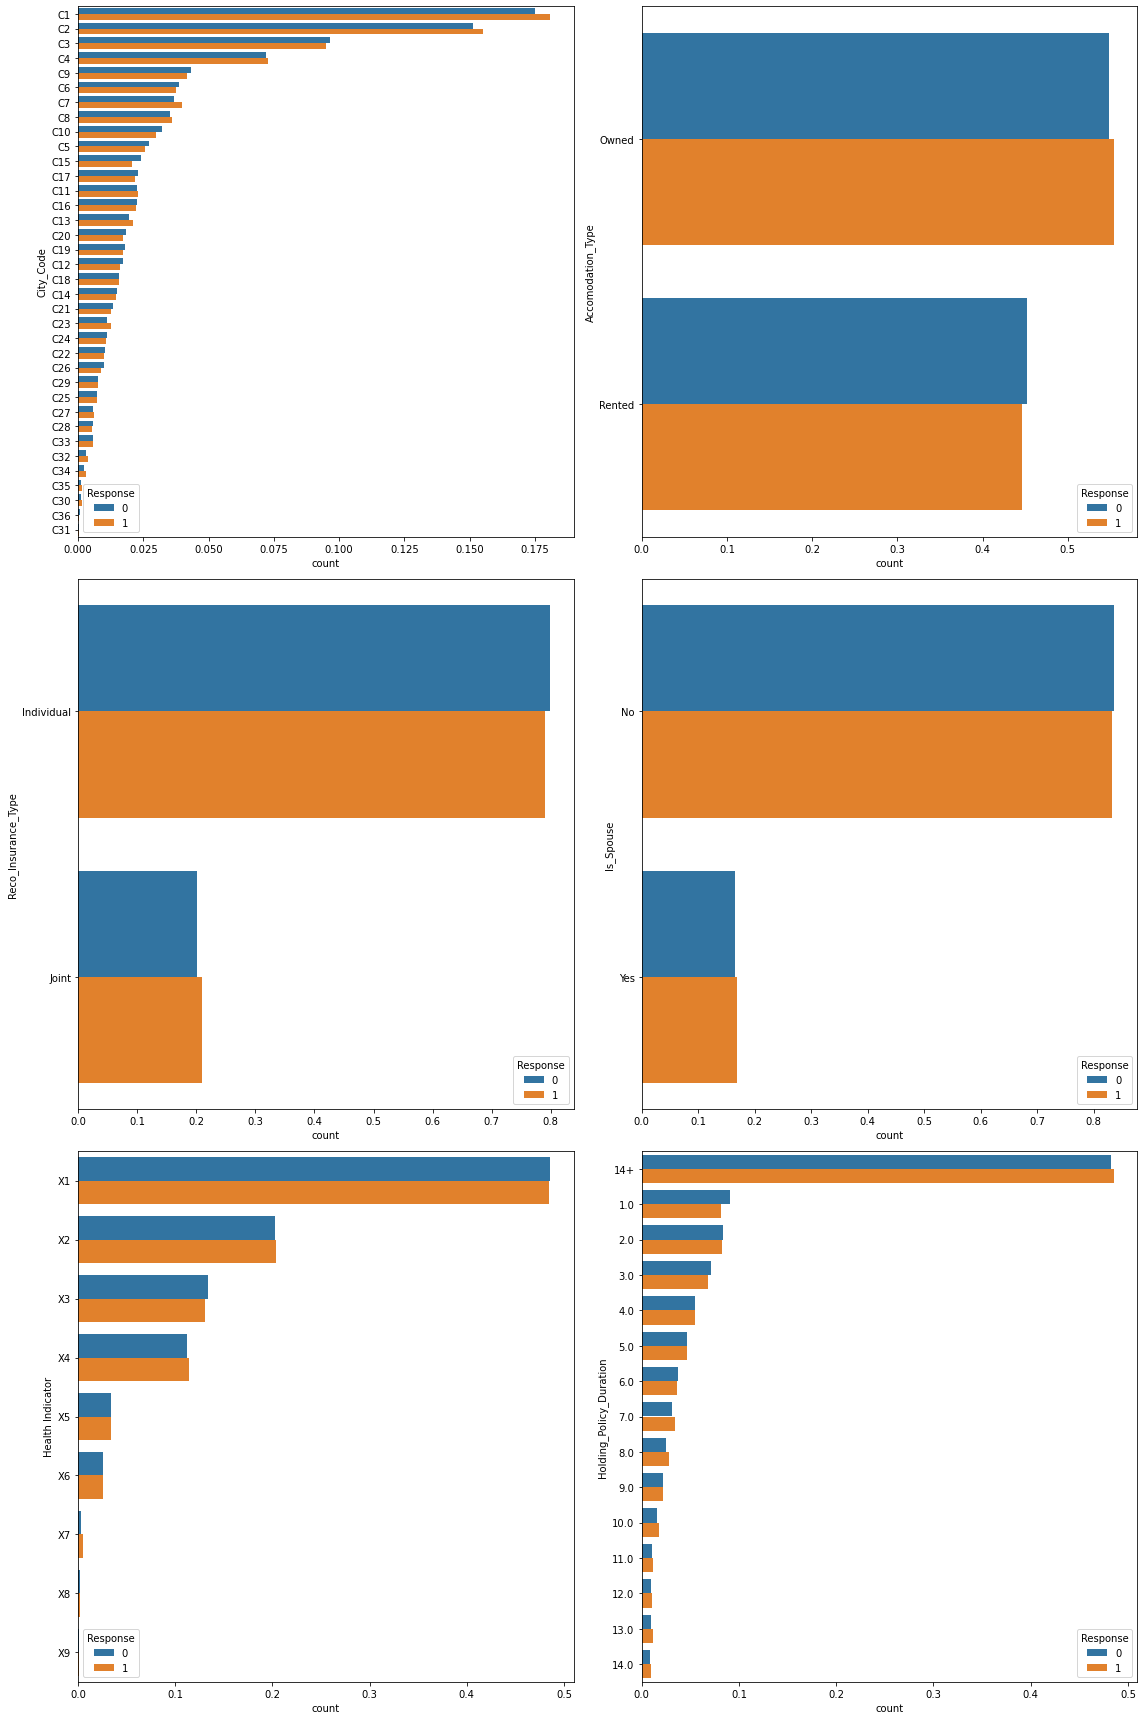

In [85]:

fig, axes = plt.subplots(3, 2, figsize=(16, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(x_train[cat_cols]):
    fltr = x_train["Response"] == 0
    vc_a = x_train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_b = x_train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a["Response"] = 0
    vc_b["Response"] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue="Response", ax=axes[i])
    
_ = plt.tight_layout()

In [86]:
x_test.isnull().sum()

City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

# Sampling

In [87]:
from sklearn.utils import resample

In [88]:
df_majority = x_train[x_train.Response==0]
df_minority = x_train[x_train.Response==1]

In [89]:
df_majority_downsampled = resample(df_majority,replace=False,n_samples=12000,random_state=123) 

In [90]:
x_train = pd.concat([df_majority_downsampled, df_minority])

In [91]:
x_train["Response"].value_counts()

1    12209
0    12000
Name: Response, dtype: int64

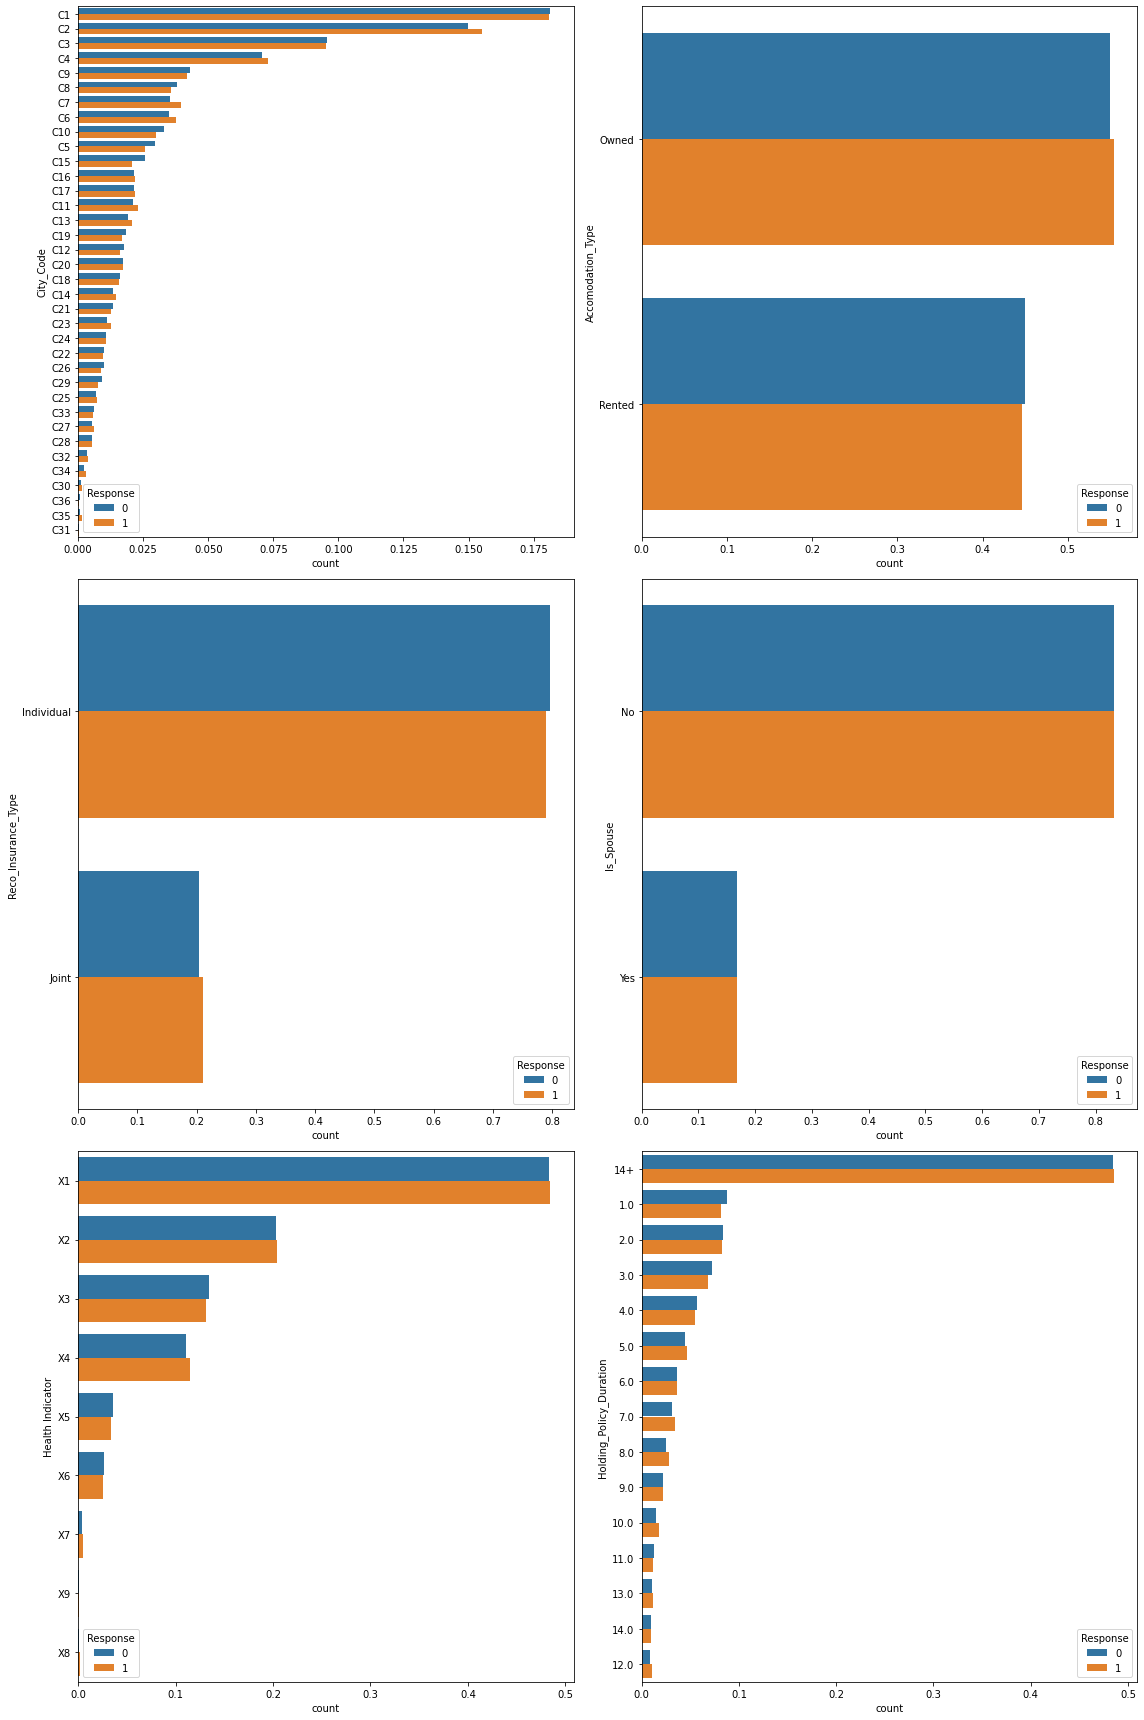

In [92]:

fig, axes = plt.subplots(3, 2, figsize=(16, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(x_train[cat_cols]):
    fltr = x_train["Response"] == 0
    vc_a = x_train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_b = x_train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a["Response"] = 0
    vc_b["Response"] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue="Response", ax=axes[i])
    
_ = plt.tight_layout()

# Skewness

In [93]:
x_train["Region_Code"] = np.sqrt(x_train["Region_Code"])
x_test["Region_Code"] = np.sqrt(x_test["Region_Code"])

In [94]:
x_train["Reco_Policy_Premium"] = np.sqrt(x_train["Reco_Policy_Premium"])
x_test["Reco_Policy_Premium"] = np.sqrt(x_test["Reco_Policy_Premium"])

# Feature Engineering

In [95]:
x_train["Difference"] = x_train["Upper_Age"]-x_train["Lower_Age"]
x_test["Difference"] = x_test["Upper_Age"]-x_test["Lower_Age"]

In [96]:
x_train.drop(columns="Upper_Age",inplace=True)
x_test.drop(columns="Upper_Age",inplace=True)

In [97]:
# x_train["Accomodation_Spouse"] = np.where((x_train["Accomodation_Type"]=="Rented") & (x_train["Is_Spouse"]=="Yes"),1,0)

# x_test["Accomodation_Spouse"] = np.where((x_test["Accomodation_Type"]=="Rented") & (x_test["Is_Spouse"]=="Yes"),1,0)

# Less Frequent

In [99]:
def rare_labels_grouping(df,cat):
    temp = df[cat].value_counts()/df.shape[0]
    
    grouping_dict = {
      k: 'rare' if k not in temp[temp>=0.03].index else k for k in temp.index
    }
    t = df[cat].map(grouping_dict)
    return t

In [100]:
x_train["Holding_Policy_Duration"] = rare_labels_grouping(x_train,"Holding_Policy_Duration")
x_test["Holding_Policy_Duration"] = rare_labels_grouping(x_test,"Holding_Policy_Duration")

In [102]:
x_train["Health Indicator"] = rare_labels_grouping(x_train,"Health Indicator")
x_test["Health Indicator"] = rare_labels_grouping(x_test,"Health Indicator")

In [103]:
x_train

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Difference
5339,C2,32.264532,Owned,Individual,46,No,X1,14+,3.0,22,122.400980,0,0
15275,C3,50.378567,Rented,Individual,52,No,X4,6.0,1.0,16,123.117830,0,0
4973,C1,19.974984,Owned,Individual,26,No,X2,1.0,1.0,12,87.498571,0,0
7087,C2,32.326460,Rented,Individual,75,No,rare,1.0,1.0,11,132.921029,0,0
7363,C3,57.749459,Owned,Joint,32,Yes,X4,14+,3.0,13,129.073622,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50858,C1,22.226111,Rented,Joint,29,Yes,X1,rare,3.0,18,155.958969,1,33
50863,C1,60.868711,Owned,Individual,75,No,X3,14+,3.0,16,133.603892,1,0
50868,C1,48.238988,Owned,Individual,75,No,X3,rare,3.0,18,148.546289,1,0
50875,C6,15.198684,Rented,Individual,36,No,X3,2.0,1.0,20,116.507510,1,0


In [104]:
x_train["Holding_Policy_Duration"].value_counts()

14+     11744
rare     2585
1.0      2055
2.0      2013
3.0      1696
4.0      1349
5.0      1093
6.0       881
7.0       793
Name: Holding_Policy_Duration, dtype: int64

In [108]:
x_train["Health Indicator"].value_counts()

X1      11717
X2       4929
X3       3210
X4       2725
X5        834
rare      794
Name: Health Indicator, dtype: int64

In [109]:
x_train

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Difference
5339,C2,32.264532,Owned,Individual,46,No,X1,14+,3.0,22,122.400980,0,0
15275,C3,50.378567,Rented,Individual,52,No,X4,6.0,1.0,16,123.117830,0,0
4973,C1,19.974984,Owned,Individual,26,No,X2,1.0,1.0,12,87.498571,0,0
7087,C2,32.326460,Rented,Individual,75,No,rare,1.0,1.0,11,132.921029,0,0
7363,C3,57.749459,Owned,Joint,32,Yes,X4,14+,3.0,13,129.073622,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50858,C1,22.226111,Rented,Joint,29,Yes,X1,rare,3.0,18,155.958969,1,33
50863,C1,60.868711,Owned,Individual,75,No,X3,14+,3.0,16,133.603892,1,0
50868,C1,48.238988,Owned,Individual,75,No,X3,rare,3.0,18,148.546289,1,0
50875,C6,15.198684,Rented,Individual,36,No,X3,2.0,1.0,20,116.507510,1,0


In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
lb = LabelEncoder()

In [112]:
# x_train["City_Code"] = lb.fit_transform(x_train["City_Code"])
# x_test["City_Code"] = lb.transform(x_test["City_Code"])

In [113]:
# x_train["Accomodation_Type"] = lb.fit_transform(x_train["Accomodation_Type"])
# x_test["Accomodation_Type"] = lb.transform(x_test["Accomodation_Type"])

In [114]:
# x_train["Reco_Insurance_Type"] = lb.fit_transform(x_train["Reco_Insurance_Type"])
# x_test["Reco_Insurance_Type"] = lb.transform(x_test["Reco_Insurance_Type"])

In [115]:
# x_train["Is_Spouse"] = lb.fit_transform(x_train["Is_Spouse"])
# x_test["Is_Spouse"] = lb.transform(x_test["Is_Spouse"])

In [116]:
# x_train["Health Indicator"] = lb.fit_transform(x_train["Health Indicator"])
# x_test["Health Indicator"] = lb.transform(x_test["Health Indicator"])

In [117]:
# x_train["Holding_Policy_Duration"] = lb.fit_transform(x_train["Holding_Policy_Duration"])
# x_test["Holding_Policy_Duration"] = lb.transform(x_test["Holding_Policy_Duration"])

In [118]:
x_train = pd.get_dummies(x_train,drop_first=True)
x_test = pd.get_dummies(x_test,drop_first=True)

In [119]:
x_train.shape,x_test.shape

((24209, 58), (21805, 57))

In [120]:
y_train = x_train["Response"]
x_train.drop(columns="Response",inplace=True)

In [121]:
x_train.shape,x_test.shape

((24209, 57), (21805, 57))

In [122]:
x_test.isnull().sum()

Region_Code                     0
Lower_Age                       0
Holding_Policy_Type             0
Reco_Policy_Cat                 0
Reco_Policy_Premium             0
Difference                      0
City_Code_C10                   0
City_Code_C11                   0
City_Code_C12                   0
City_Code_C13                   0
City_Code_C14                   0
City_Code_C15                   0
City_Code_C16                   0
City_Code_C17                   0
City_Code_C18                   0
City_Code_C19                   0
City_Code_C2                    0
City_Code_C20                   0
City_Code_C21                   0
City_Code_C22                   0
City_Code_C23                   0
City_Code_C24                   0
City_Code_C25                   0
City_Code_C26                   0
City_Code_C27                   0
City_Code_C28                   0
City_Code_C29                   0
City_Code_C3                    0
City_Code_C30                   0
City_Code_C31 

In [123]:
# from imblearn.over_sampling import SMOTE

# oversample = SMOTE()

# x_train_smote,y_train_smote = oversample.fit_sample(x_train,y_train)

# x_train.shape,y_train.shape,x_test.shape

# XGBoost

In [2185]:
from xgboost import XGBClassifier

In [44]:
from sklearn.metrics import roc_auc_score,make_scorer
from sklearn.model_selection import cross_val_score

In [45]:
scoring_function = make_scorer(roc_auc_score)

In [2188]:
xg = XGBClassifier(max_depth=10,reg_lambda=0.4,n_estimators=500)
# reg_alpha
# reg_lambda
# ,criterion="gini"

In [2189]:
scores = cross_val_score(xg, x_train, y_train, cv=5,scoring=scoring_function)

In [2190]:
scores

array([0.59062039, 0.59921222, 0.58704597, 0.59014947, 0.58677659])

In [2191]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=0.4, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [2192]:
y_pred_xg = xg.predict(x_train)

In [2193]:
roc_auc_score(y_pred_xg,y_train)

0.9999173799382969

In [2194]:
xg.score(x_train,y_train)

0.9999173860960799

In [2195]:
y_xg = xg.predict_proba(x_test)

In [2196]:
y_xg = pd.DataFrame(y_xg,columns=["0","1"])

In [2197]:
y_xg = y_xg["1"]

In [2198]:
y_xg = np.array(y_xg).reshape(-1,1)

<AxesSubplot:>

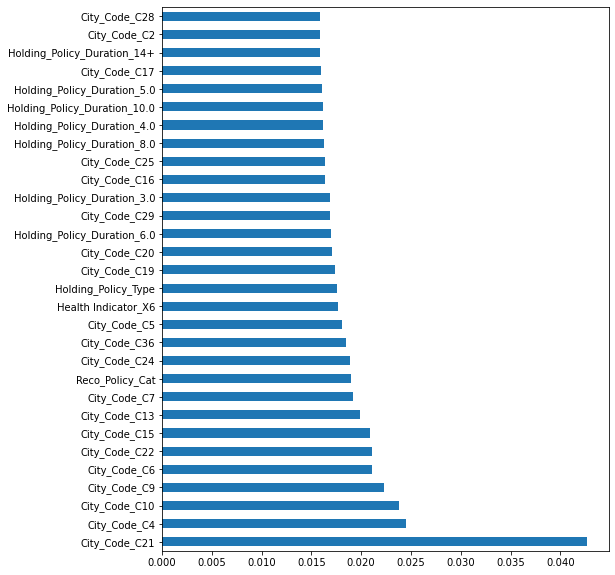

In [2199]:
feat_imp = pd.Series(xg.feature_importances_, index=x_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [45]:
y_prediction = np.hstack([sample,y_xg])

In [46]:
df = pd.DataFrame(y_prediction ,columns = ["ID","Response"])
df.to_csv("xgb.csv",index=False)

In [841]:
x_test.isnull().sum()

Region_Code                     12403
Lower_Age                           0
Holding_Policy_Type              8603
Reco_Policy_Cat                     0
Reco_Policy_Premium                 0
                                ...  
Holding_Policy_Duration_3.0         0
Holding_Policy_Duration_4.0         0
Holding_Policy_Duration_5.0         0
Holding_Policy_Duration_6.0         0
Holding_Policy_Duration_rare        0
Length: 61, dtype: int64

# LGBM

In [124]:
from lightgbm import LGBMClassifier

In [125]:
scoring_function = make_scorer(roc_auc_score)

In [138]:
# lgb = LGBMClassifier(max_depth=8,reg_alpha=0.2,num_leaves=32,reg_lambda=0.5,n_estimators=300,random_state=42)1000
# lgb = LGBMClassifier(max_depth=8,reg_alpha=0.2,num_leaves=32,reg_lambda=0.5,n_estimators=300,random_state=42)13
# lgb = LGBMClassifier(max_depth=8,reg_alpha=0.2,num_leaves=32,reg_lambda=0.5,n_estimators=400,random_state=42)12
# lgb = LGBMClassifier(max_depth=8,reg_alpha=0.3,num_leaves=32,reg_lambda=0.5,n_estimators=400,random_state=42)Best
lgb = LGBMClassifier(max_depth=8,reg_alpha=0.3,num_leaves=2048,reg_lambda=0.5,n_estimators=500,random_state=42)

In [ ]:
scores = cross_val_score(lgb, x_train, y_train, cv=5,scoring=scoring_function)

In [ ]:
scores

In [2321]:
lgb.fit(x_train,y_train)

LGBMClassifier(max_depth=8, n_estimators=400, num_leaves=32, random_state=42,
               reg_alpha=0.3, reg_lambda=0.5)

In [2322]:
y_pred_lg = lgb.predict(x_train)

In [2323]:
roc_auc_score(y_pred_lg,y_train)

0.8032663153444246

In [2324]:
np.sum(y_pred_lg==y_train)/x_train.shape[0]*100

80.11896402164484

In [2325]:
lgb.score(x_train,y_train)

0.8011896402164485

In [2326]:
y_lgb = lgb.predict_proba(x_test)

In [2327]:
y_lgb = pd.DataFrame(y_lgb,columns=["0","1"])

In [2328]:
y_lgb = y_lgb["1"]

In [2329]:
y_lgb = np.array(y_lgb)

In [2330]:
y_lgb = y_lgb.reshape(-1,1)

<AxesSubplot:>

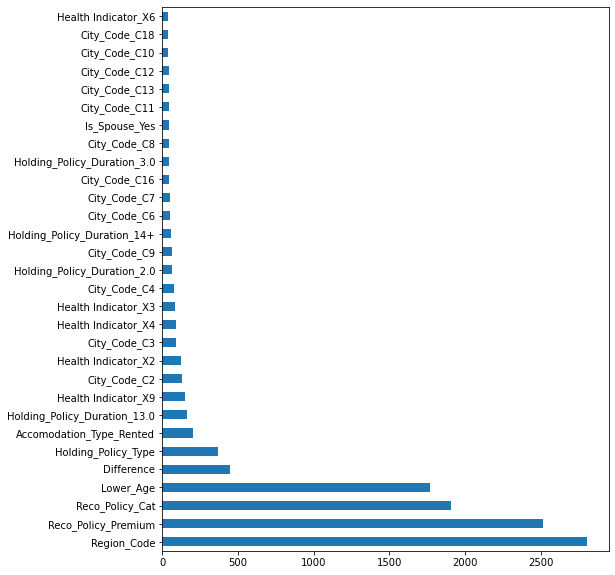

In [2331]:
feat_imp = pd.Series(lgb.feature_importances_, index=x_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [2332]:
y_prediction = np.hstack([sample,y_lgb])

In [2333]:
df = pd.DataFrame(y_prediction ,columns = ["ID","Response"])
df.to_csv("lgb.csv",index=False)

In [2334]:
x_train

,Region_Code,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Difference,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,...,Holding_Policy_Duration_14+,Holding_Policy_Duration_14.0,Holding_Policy_Duration_2.0,Holding_Policy_Duration_3.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0
5339,32.264532,46,3.0,22,122.400980,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15275,50.378567,52,1.0,16,123.117830,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4973,19.974984,26,1.0,12,87.498571,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7087,32.326460,75,1.0,11,132.921029,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7363,57.749459,32,3.0,13,129.073622,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50858,22.226111,29,3.0,18,155.958969,33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50863,60.868711,75,3.0,16,133.603892,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50868,48.238988,75,3.0,18,148.546289,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50875,15.198684,36,1.0,20,116.507510,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [2341]:
imp_features = sorted(np.stack((x_test.columns,lgb.feature_importances_),axis=1),key=lambda x_train:x_train[1],reverse=True)[:20]

In [2342]:
imp_features_np = np.array(imp_features)

In [2343]:
imp_features

[array(['Region_Code', 2808], dtype=object),
 array(['Reco_Policy_Premium', 2516], dtype=object),
 array(['Reco_Policy_Cat', 1908], dtype=object),
 array(['Lower_Age', 1767], dtype=object),
 array(['Difference', 451], dtype=object),
 array(['Holding_Policy_Type', 368], dtype=object),
 array(['Accomodation_Type_Rented', 206], dtype=object),
 array(['Holding_Policy_Duration_13.0', 164], dtype=object),
 array(['Health Indicator_X9', 152], dtype=object),
 array(['City_Code_C2', 129], dtype=object),
 array(['Health Indicator_X2', 126], dtype=object),
 array(['City_Code_C3', 92], dtype=object),
 array(['Health Indicator_X4', 90], dtype=object),
 array(['Health Indicator_X3', 82], dtype=object),
 array(['City_Code_C4', 75], dtype=object),
 array(['Holding_Policy_Duration_2.0', 66], dtype=object),
 array(['City_Code_C9', 62], dtype=object),
 array(['Holding_Policy_Duration_14+', 58], dtype=object),
 array(['City_Code_C6', 51], dtype=object),
 array(['City_Code_C7', 49], dtype=object)]

In [2344]:
# np.sum(imp_features_np[:,1:])

In [2345]:
imp_features = list(np.array(imp_features)[:,0])

In [2346]:
x_lg_train = x_train[imp_features]
x_lg_test = x_test[imp_features]

In [2347]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [2348]:
sc = MinMaxScaler()

In [2349]:
x_lg_train = sc.fit_transform(x_lg_train)
x_lg_test = sc.transform(x_lg_test)

In [2350]:
x_lg_train = pd.DataFrame(x_lg_train,columns=imp_features)
x_lg_test = pd.DataFrame(x_lg_test,columns=imp_features)

In [2351]:
scores = cross_val_score(lgb, x_lg_train, y_train, cv=5,scoring=scoring_function)

In [2352]:
scores

array([0.59220516, 0.60081491, 0.59174908, 0.5929484 , 0.58268017])

In [2353]:
lgb.fit(x_lg_train,y_train)

LGBMClassifier(max_depth=8, n_estimators=400, num_leaves=32, random_state=42,
               reg_alpha=0.3, reg_lambda=0.5)

In [2354]:
y_pred_lg = lgb.predict(x_lg_train)

In [2355]:
roc_auc_score(y_pred_lg,y_train)

0.7992748587936119

In [2356]:
lgb.score(x_lg_train,y_train)

0.7962741129332067

In [342]:
y_lgb = lgb.predict_proba(x_lg_test)

In [343]:
y_lgb = pd.DataFrame(y_lgb,columns=["0","1"])

In [344]:
y_lgb = y_lgb["1"]

In [345]:
y_lgb = np.array(y_lgb)

<AxesSubplot:>

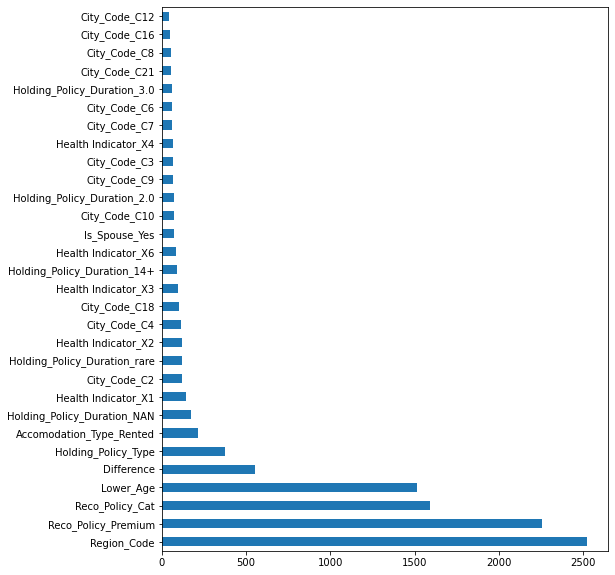

In [346]:
feat_imp = pd.Series(lgb.feature_importances_, index=x_lg_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [348]:
y_prediction = np.hstack([sample,y_lgb.reshape(-1,1)])

In [349]:
df = pd.DataFrame(y_prediction ,columns = ["ID","Response"])
df.to_csv("lgb.csv",index=False)

# Cat Boost

In [103]:
from catboost import CatBoostClassifier

In [104]:
scoring_function = make_scorer(roc_auc_score)


In [134]:
CB = CatBoostClassifier(depth = 6,n_estimators=300,learning_rate=0.1,random_state=42)
# l2_leaf_reg=0.03

In [135]:
scores = cross_val_score(CB, x_train, y_train, cv=5,scoring=scoring_function)

0:	learn: 0.6852611	total: 26ms	remaining: 7.78s
1:	learn: 0.6815983	total: 44.4ms	remaining: 6.62s
2:	learn: 0.6781636	total: 64.9ms	remaining: 6.42s
3:	learn: 0.6737651	total: 84.9ms	remaining: 6.28s
4:	learn: 0.6715944	total: 103ms	remaining: 6.07s
5:	learn: 0.6701334	total: 122ms	remaining: 6s
6:	learn: 0.6687568	total: 139ms	remaining: 5.83s
7:	learn: 0.6668274	total: 154ms	remaining: 5.63s
8:	learn: 0.6640936	total: 173ms	remaining: 5.59s
9:	learn: 0.6631004	total: 190ms	remaining: 5.51s
10:	learn: 0.6620690	total: 208ms	remaining: 5.46s
11:	learn: 0.6606677	total: 225ms	remaining: 5.4s
12:	learn: 0.6596401	total: 238ms	remaining: 5.25s
13:	learn: 0.6591970	total: 255ms	remaining: 5.2s
14:	learn: 0.6587116	total: 274ms	remaining: 5.21s
15:	learn: 0.6570830	total: 293ms	remaining: 5.21s
16:	learn: 0.6563255	total: 312ms	remaining: 5.2s
17:	learn: 0.6554735	total: 333ms	remaining: 5.22s
18:	learn: 0.6544715	total: 348ms	remaining: 5.14s
19:	learn: 0.6537125	total: 365ms	remaining: 

169:	learn: 0.6099506	total: 3.12s	remaining: 2.39s
170:	learn: 0.6095988	total: 3.14s	remaining: 2.37s
171:	learn: 0.6094826	total: 3.16s	remaining: 2.35s
172:	learn: 0.6092032	total: 3.17s	remaining: 2.33s
173:	learn: 0.6089492	total: 3.19s	remaining: 2.31s
174:	learn: 0.6087755	total: 3.21s	remaining: 2.3s
175:	learn: 0.6084902	total: 3.24s	remaining: 2.28s
176:	learn: 0.6081337	total: 3.26s	remaining: 2.26s
177:	learn: 0.6078517	total: 3.27s	remaining: 2.24s
178:	learn: 0.6076679	total: 3.29s	remaining: 2.23s
179:	learn: 0.6073361	total: 3.31s	remaining: 2.21s
180:	learn: 0.6070850	total: 3.33s	remaining: 2.19s
181:	learn: 0.6067983	total: 3.35s	remaining: 2.17s
182:	learn: 0.6065782	total: 3.37s	remaining: 2.15s
183:	learn: 0.6060774	total: 3.39s	remaining: 2.14s
184:	learn: 0.6057958	total: 3.41s	remaining: 2.12s
185:	learn: 0.6055818	total: 3.43s	remaining: 2.1s
186:	learn: 0.6053555	total: 3.45s	remaining: 2.09s
187:	learn: 0.6051128	total: 3.48s	remaining: 2.07s
188:	learn: 0.

30:	learn: 0.6487801	total: 597ms	remaining: 5.18s
31:	learn: 0.6485327	total: 609ms	remaining: 5.1s
32:	learn: 0.6482741	total: 626ms	remaining: 5.06s
33:	learn: 0.6480796	total: 634ms	remaining: 4.96s
34:	learn: 0.6477083	total: 657ms	remaining: 4.97s
35:	learn: 0.6472345	total: 679ms	remaining: 4.98s
36:	learn: 0.6467911	total: 699ms	remaining: 4.97s
37:	learn: 0.6461474	total: 722ms	remaining: 4.97s
38:	learn: 0.6459222	total: 737ms	remaining: 4.93s
39:	learn: 0.6453732	total: 756ms	remaining: 4.92s
40:	learn: 0.6451899	total: 774ms	remaining: 4.89s
41:	learn: 0.6444483	total: 790ms	remaining: 4.85s
42:	learn: 0.6441757	total: 809ms	remaining: 4.83s
43:	learn: 0.6439410	total: 829ms	remaining: 4.82s
44:	learn: 0.6436717	total: 845ms	remaining: 4.79s
45:	learn: 0.6433261	total: 865ms	remaining: 4.78s
46:	learn: 0.6428161	total: 882ms	remaining: 4.75s
47:	learn: 0.6427148	total: 897ms	remaining: 4.71s
48:	learn: 0.6422452	total: 917ms	remaining: 4.7s
49:	learn: 0.6418630	total: 939ms

194:	learn: 0.6017644	total: 3.7s	remaining: 1.99s
195:	learn: 0.6014983	total: 3.71s	remaining: 1.97s
196:	learn: 0.6011761	total: 3.72s	remaining: 1.95s
197:	learn: 0.6010247	total: 3.74s	remaining: 1.93s
198:	learn: 0.6008979	total: 3.75s	remaining: 1.91s
199:	learn: 0.6007682	total: 3.77s	remaining: 1.89s
200:	learn: 0.6005354	total: 3.79s	remaining: 1.87s
201:	learn: 0.6003843	total: 3.81s	remaining: 1.85s
202:	learn: 0.6001084	total: 3.83s	remaining: 1.83s
203:	learn: 0.5999355	total: 3.85s	remaining: 1.81s
204:	learn: 0.5997505	total: 3.87s	remaining: 1.79s
205:	learn: 0.5994816	total: 3.89s	remaining: 1.77s
206:	learn: 0.5992781	total: 3.9s	remaining: 1.75s
207:	learn: 0.5989980	total: 3.92s	remaining: 1.74s
208:	learn: 0.5987646	total: 3.94s	remaining: 1.72s
209:	learn: 0.5985329	total: 3.97s	remaining: 1.7s
210:	learn: 0.5983068	total: 3.98s	remaining: 1.68s
211:	learn: 0.5981122	total: 4s	remaining: 1.66s
212:	learn: 0.5979397	total: 4.02s	remaining: 1.64s
213:	learn: 0.5977

60:	learn: 0.6398636	total: 1.11s	remaining: 4.37s
61:	learn: 0.6396734	total: 1.13s	remaining: 4.33s
62:	learn: 0.6395877	total: 1.14s	remaining: 4.3s
63:	learn: 0.6390966	total: 1.16s	remaining: 4.28s
64:	learn: 0.6388815	total: 1.18s	remaining: 4.27s
65:	learn: 0.6384607	total: 1.2s	remaining: 4.25s
66:	learn: 0.6381994	total: 1.22s	remaining: 4.23s
67:	learn: 0.6379882	total: 1.23s	remaining: 4.21s
68:	learn: 0.6378064	total: 1.25s	remaining: 4.19s
69:	learn: 0.6375103	total: 1.27s	remaining: 4.18s
70:	learn: 0.6372828	total: 1.29s	remaining: 4.16s
71:	learn: 0.6369959	total: 1.31s	remaining: 4.13s
72:	learn: 0.6367292	total: 1.32s	remaining: 4.12s
73:	learn: 0.6364964	total: 1.34s	remaining: 4.1s
74:	learn: 0.6361941	total: 1.36s	remaining: 4.09s
75:	learn: 0.6359664	total: 1.38s	remaining: 4.08s
76:	learn: 0.6357662	total: 1.4s	remaining: 4.06s
77:	learn: 0.6354595	total: 1.42s	remaining: 4.04s
78:	learn: 0.6350920	total: 1.44s	remaining: 4.02s
79:	learn: 0.6349155	total: 1.46s	r

225:	learn: 0.5957166	total: 4.02s	remaining: 1.31s
226:	learn: 0.5954814	total: 4.03s	remaining: 1.29s
227:	learn: 0.5953096	total: 4.04s	remaining: 1.28s
228:	learn: 0.5951658	total: 4.06s	remaining: 1.26s
229:	learn: 0.5949437	total: 4.08s	remaining: 1.24s
230:	learn: 0.5947191	total: 4.09s	remaining: 1.22s
231:	learn: 0.5945525	total: 4.11s	remaining: 1.21s
232:	learn: 0.5942842	total: 4.13s	remaining: 1.19s
233:	learn: 0.5940567	total: 4.15s	remaining: 1.17s
234:	learn: 0.5938583	total: 4.17s	remaining: 1.15s
235:	learn: 0.5936361	total: 4.19s	remaining: 1.14s
236:	learn: 0.5934137	total: 4.21s	remaining: 1.12s
237:	learn: 0.5932316	total: 4.23s	remaining: 1.1s
238:	learn: 0.5930581	total: 4.25s	remaining: 1.08s
239:	learn: 0.5928934	total: 4.27s	remaining: 1.07s
240:	learn: 0.5927001	total: 4.29s	remaining: 1.05s
241:	learn: 0.5924778	total: 4.32s	remaining: 1.04s
242:	learn: 0.5922334	total: 4.34s	remaining: 1.02s
243:	learn: 0.5919946	total: 4.37s	remaining: 1s
244:	learn: 0.59

93:	learn: 0.6305039	total: 1.87s	remaining: 4.1s
94:	learn: 0.6300831	total: 1.88s	remaining: 4.06s
95:	learn: 0.6298103	total: 1.9s	remaining: 4.03s
96:	learn: 0.6296171	total: 1.91s	remaining: 4s
97:	learn: 0.6294804	total: 1.93s	remaining: 3.98s
98:	learn: 0.6292636	total: 1.95s	remaining: 3.97s
99:	learn: 0.6290854	total: 1.97s	remaining: 3.94s
100:	learn: 0.6287635	total: 1.99s	remaining: 3.92s
101:	learn: 0.6285810	total: 2.01s	remaining: 3.9s
102:	learn: 0.6282228	total: 2.03s	remaining: 3.88s
103:	learn: 0.6279161	total: 2.05s	remaining: 3.87s
104:	learn: 0.6277829	total: 2.07s	remaining: 3.84s
105:	learn: 0.6275768	total: 2.08s	remaining: 3.81s
106:	learn: 0.6272893	total: 2.1s	remaining: 3.8s
107:	learn: 0.6271677	total: 2.12s	remaining: 3.78s
108:	learn: 0.6268394	total: 2.15s	remaining: 3.76s
109:	learn: 0.6265306	total: 2.17s	remaining: 3.75s
110:	learn: 0.6263092	total: 2.19s	remaining: 3.73s
111:	learn: 0.6260435	total: 2.21s	remaining: 3.71s
112:	learn: 0.6257176	total

261:	learn: 0.5880770	total: 5.05s	remaining: 732ms
262:	learn: 0.5879243	total: 5.06s	remaining: 712ms
263:	learn: 0.5877599	total: 5.08s	remaining: 693ms
264:	learn: 0.5875979	total: 5.1s	remaining: 673ms
265:	learn: 0.5873719	total: 5.12s	remaining: 654ms
266:	learn: 0.5871842	total: 5.14s	remaining: 636ms
267:	learn: 0.5870924	total: 5.16s	remaining: 616ms
268:	learn: 0.5869033	total: 5.18s	remaining: 597ms
269:	learn: 0.5866470	total: 5.2s	remaining: 578ms
270:	learn: 0.5864645	total: 5.22s	remaining: 559ms
271:	learn: 0.5862070	total: 5.23s	remaining: 539ms
272:	learn: 0.5859860	total: 5.25s	remaining: 519ms
273:	learn: 0.5857588	total: 5.27s	remaining: 500ms
274:	learn: 0.5855834	total: 5.29s	remaining: 481ms
275:	learn: 0.5853986	total: 5.31s	remaining: 461ms
276:	learn: 0.5850704	total: 5.33s	remaining: 442ms
277:	learn: 0.5848711	total: 5.34s	remaining: 423ms
278:	learn: 0.5846276	total: 5.35s	remaining: 403ms
279:	learn: 0.5843745	total: 5.36s	remaining: 383ms
280:	learn: 0.

126:	learn: 0.6206499	total: 2.21s	remaining: 3.02s
127:	learn: 0.6202012	total: 2.23s	remaining: 2.99s
128:	learn: 0.6197796	total: 2.24s	remaining: 2.97s
129:	learn: 0.6194307	total: 2.26s	remaining: 2.96s
130:	learn: 0.6191769	total: 2.27s	remaining: 2.94s
131:	learn: 0.6190455	total: 2.29s	remaining: 2.91s
132:	learn: 0.6187909	total: 2.31s	remaining: 2.9s
133:	learn: 0.6185611	total: 2.33s	remaining: 2.88s
134:	learn: 0.6183132	total: 2.35s	remaining: 2.87s
135:	learn: 0.6179773	total: 2.37s	remaining: 2.85s
136:	learn: 0.6176494	total: 2.39s	remaining: 2.84s
137:	learn: 0.6174304	total: 2.4s	remaining: 2.82s
138:	learn: 0.6171602	total: 2.42s	remaining: 2.8s
139:	learn: 0.6168966	total: 2.44s	remaining: 2.79s
140:	learn: 0.6166124	total: 2.46s	remaining: 2.77s
141:	learn: 0.6164202	total: 2.48s	remaining: 2.75s
142:	learn: 0.6161343	total: 2.49s	remaining: 2.74s
143:	learn: 0.6158611	total: 2.51s	remaining: 2.72s
144:	learn: 0.6156330	total: 2.53s	remaining: 2.7s
145:	learn: 0.61

292:	learn: 0.5827297	total: 5.14s	remaining: 123ms
293:	learn: 0.5825526	total: 5.15s	remaining: 105ms
294:	learn: 0.5823989	total: 5.17s	remaining: 87.6ms
295:	learn: 0.5822631	total: 5.19s	remaining: 70.1ms
296:	learn: 0.5821785	total: 5.2s	remaining: 52.5ms
297:	learn: 0.5818978	total: 5.22s	remaining: 35.1ms
298:	learn: 0.5815714	total: 5.24s	remaining: 17.5ms
299:	learn: 0.5813897	total: 5.26s	remaining: 0us


In [136]:
scores

array([0.59102048, 0.58959664, 0.59254423, 0.58810647, 0.5951483 ])

In [137]:
CB.fit(x_train,y_train)

0:	learn: 0.6854826	total: 31.2ms	remaining: 9.32s
1:	learn: 0.6819437	total: 51.4ms	remaining: 7.66s
2:	learn: 0.6787841	total: 72.3ms	remaining: 7.16s
3:	learn: 0.6751011	total: 92.1ms	remaining: 6.81s
4:	learn: 0.6710931	total: 112ms	remaining: 6.62s
5:	learn: 0.6685207	total: 135ms	remaining: 6.61s
6:	learn: 0.6669772	total: 159ms	remaining: 6.64s
7:	learn: 0.6660189	total: 176ms	remaining: 6.43s
8:	learn: 0.6651063	total: 197ms	remaining: 6.38s
9:	learn: 0.6635682	total: 214ms	remaining: 6.2s
10:	learn: 0.6618596	total: 229ms	remaining: 6.02s
11:	learn: 0.6601277	total: 247ms	remaining: 5.92s
12:	learn: 0.6587196	total: 267ms	remaining: 5.89s
13:	learn: 0.6579738	total: 290ms	remaining: 5.92s
14:	learn: 0.6570793	total: 305ms	remaining: 5.79s
15:	learn: 0.6566288	total: 324ms	remaining: 5.74s
16:	learn: 0.6561856	total: 338ms	remaining: 5.62s
17:	learn: 0.6556928	total: 350ms	remaining: 5.48s
18:	learn: 0.6553523	total: 371ms	remaining: 5.49s
19:	learn: 0.6548971	total: 390ms	rema

165:	learn: 0.6148494	total: 2.99s	remaining: 2.42s
166:	learn: 0.6147335	total: 3.01s	remaining: 2.4s
167:	learn: 0.6145761	total: 3.03s	remaining: 2.38s
168:	learn: 0.6143998	total: 3.06s	remaining: 2.37s
169:	learn: 0.6142353	total: 3.08s	remaining: 2.36s
170:	learn: 0.6140098	total: 3.11s	remaining: 2.35s
171:	learn: 0.6137753	total: 3.13s	remaining: 2.33s
172:	learn: 0.6135462	total: 3.16s	remaining: 2.32s
173:	learn: 0.6133762	total: 3.18s	remaining: 2.3s
174:	learn: 0.6131112	total: 3.21s	remaining: 2.29s
175:	learn: 0.6129065	total: 3.23s	remaining: 2.28s
176:	learn: 0.6126439	total: 3.26s	remaining: 2.26s
177:	learn: 0.6124208	total: 3.28s	remaining: 2.25s
178:	learn: 0.6122067	total: 3.31s	remaining: 2.24s
179:	learn: 0.6119612	total: 3.33s	remaining: 2.22s
180:	learn: 0.6117607	total: 3.35s	remaining: 2.21s
181:	learn: 0.6116159	total: 3.38s	remaining: 2.19s
182:	learn: 0.6114933	total: 3.4s	remaining: 2.17s
183:	learn: 0.6113313	total: 3.42s	remaining: 2.16s
184:	learn: 0.6

In [138]:
y_pred_cb = CB.predict(x_train)

In [139]:
roc_auc_score(y_pred_cb,y_train)

0.6984401019425238

In [140]:
CB.score(x_train,y_train)

0.6958359366386122

In [141]:
y_cb = CB.predict_proba(x_test)

In [142]:
y_cb = pd.DataFrame(y_cb,columns=["0","1"])

In [143]:
y_cb = y_cb["1"]

In [144]:
y_cb = np.array(y_cb).reshape(-1,1)

<AxesSubplot:>

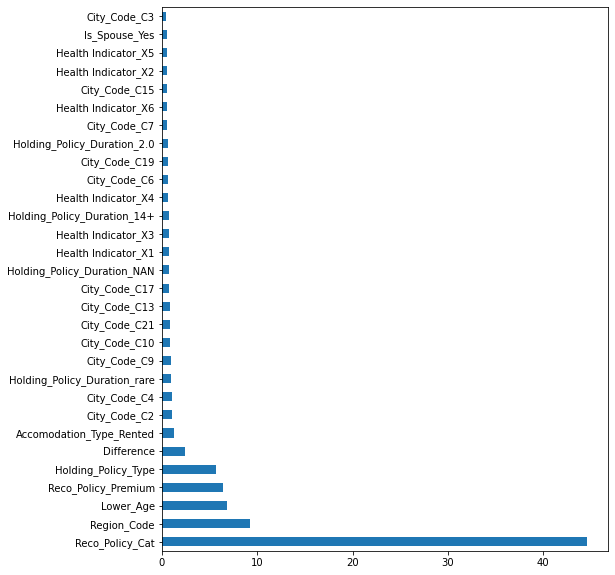

In [145]:
feat_imp = pd.Series(CB.feature_importances_, index=x_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [146]:
y_prediction = np.hstack([sample,y_cb])

In [147]:
df = pd.DataFrame(y_prediction ,columns = ["ID","Response"])
df.to_csv("cb.csv",index=False)

Bins

In [ ]:
# target['Temp_class'] = pd.qcut(target['Temeratue'], 10, labels=False)

https://github.com/AnilBetta/AV-JOB-A-THON

In [20]:
pd.merge?